In [9]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

city_df = pd.read_csv('raw_data/city_data.csv')
rides_df = pd.read_csv('raw_data/ride_data.csv')

combined_df = city_df.merge(rides_df, on='city', how='left')


In [17]:
# x: rides per city
x_list = combined_df.groupby(by='city')['ride_id'].count()
# y: average fare in city
y_list = round(combined_df.groupby(by='city')['fare'].mean(),2)
# z: driver count in city
z_list = combined_df.drop_duplicates(subset='city', keep='first').set_index('city')['driver_count']*8
# color: based on the type for each city
type_list = combined_df.drop_duplicates(subset='city', keep='first').set_index('city')['type']

bubbleData_df = pd.DataFrame({'x':x_list,'y':y_list,'z':z_list,'City Type':type_list})

# create color list
color_list = {'Urban':'gold', 'Suburban':'lightcoral', 'Rural':'lightskyblue'}

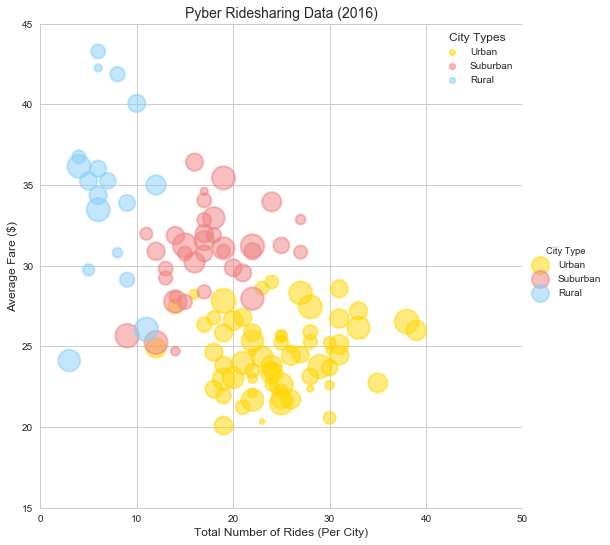

In [18]:
sns.set(style='whitegrid', context='notebook')
bubblePlot=sns.lmplot(x='x', y='y', data=bubbleData_df, hue='City Type', palette=color_list,
                      fit_reg=False, size=7.5,
                      scatter_kws={'s':z_list, 'alpha':0.5, 'edgecolors':'face', 'linewidths':2})

legend = plt.legend(fontsize='small',loc='best',title = 'City Types')
legend.legendHandles[0]._sizes= [30]
legend.legendHandles[1]._sizes= [30]
legend.legendHandles[2]._sizes= [30]


plt.xlim(0,50)
plt.ylim(15,45)
plt.title("Pyber Ridesharing Data (2016)",{'fontname':'Arial','fontsize':14})
plt.xlabel("Total Number of Rides (Per City)",{'fontname':'Arial','fontsize':12})
plt.ylabel("Average Fare ($)",{'fontname':'Arial','fontsize':12})
plt.show()

1. Based on this graph, an observation I have made is a trend that is correlated with this data that would say as the city type goes from rural to urban, the fare stats to decrease. This could be due to a variety of facors but most likely to to supply and demand where more people generate more frequency of rides and provides stiffer completion.

2. The most interesting observation I have found as a single point of data was at 25 rides and about $27 fare which caused the urban data to overlap the subruban data. More investigation should be done on this data point to find if it's an outlier or the reasoning behind the overlap in data

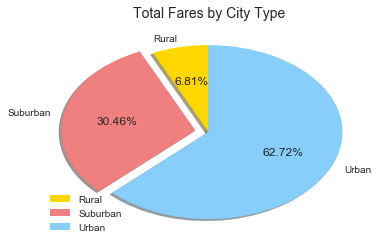

In [12]:
#Total Fares by City Type
fareByCity_df = pd.DataFrame(cityPlusRides_df.groupby(by='type')['fare'].sum())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [fareByCity_df['fare'][0]/fareByCity_df['fare'].sum(),\
               fareByCity_df['fare'][1]/fareByCity_df['fare'].sum(),\
               fareByCity_df['fare'][2]/fareByCity_df['fare'].sum()]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.2f%%', startangle=90,\
        colors=colors, explode=explode, shadow=True)
ax1.axis('off')
plt.legend(loc='lower left')
plt.title("Total Fares by City Type",{'fontname':'Arial','fontsize':14})
plt.show()

3. Based on the data in this pie chart, the best way to increase revenue for Pyber would be to focus on marketing in the urban area. Although they could exapand and try to increase the number of rides in the suburban market to diversify thier rider count across multiiple city types, it wouldn't increase their revenue as fast. 

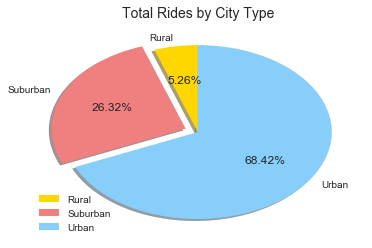

In [14]:
#Total Rides by city type
ridesByCity_df = pd.DataFrame(cityPlusRides_df.groupby(by='type')['ride_id'].count())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [ridesByCity_df['ride_id']['Rural']/ridesByCity_df['ride_id'].sum(),\
               ridesByCity_df['ride_id']['Suburban']/ridesByCity_df['ride_id'].sum(),\
               ridesByCity_df['ride_id']['Urban']/ridesByCity_df['ride_id'].sum()]
explode = (0, 0.1, 0)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.2f%%',\
        startangle=90, colors=colors, explode=explode, shadow=True)
ax1.axis('off')
plt.legend(loc='lower left')
plt.title("Total Rides by City Type",{'fontname':'Arial','fontsize':14})
plt.show()

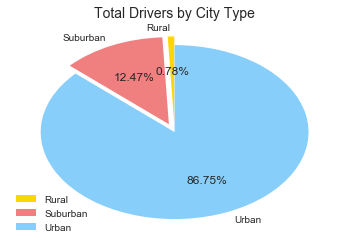

In [13]:
#Total Drivers by city type
driversByCity_df = pd.DataFrame(cityPlusRides_df.groupby(by='type')['driver_count'].sum())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [driversByCity_df['driver_count']['Rural']/driversByCity_df['driver_count'].sum(),\
               driversByCity_df['driver_count']['Suburban']/driversByCity_df['driver_count'].sum(),\
               driversByCity_df['driver_count']['Urban']/driversByCity_df['driver_count'].sum()]
explode = (0.1, 0.1, 0)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)
ax1.axis('off')
plt.legend(loc='lower left')
plt.title("Total Drivers by City Type",{'fontname':'Arial','fontsize':14})
plt.show()